# COGS 118A - Project Checkpoint

# Names

- Hinn Zhang
- Jingyue Xu

# Abstract 

Our project seeks to re-evaluate football (soccer) player evaluation provided in the FIFA game and offer an alternative interpretation of player ratings based on different knowledge of football players. Our dataset captures diverse attributes such as player styles, team lineup, and detailed match events from over 25,000 matches across several European countries from 2008  to 2016. Through data preprocessing, exploratory data analysis, feature selection, and model selection, we seek to identify the most predictive features and construct an optimal model for player performance. The project will leverage various machine learning techniques, including linear regression, logistic regression, and multiple regression, with a focus on model interpretability. The performance of the predictive model will be assessed using a suite of metrics, including to ensure a comprehensive understanding of the model's predictive power and generalizability.

# Background

Despite that EA Sports and FIFA have parted ways after over three decades of partnership<a name="1"></a>[<sup>[1]</sup>](#1note), the football game developed by Electronic Arts has undoubtfully impacted the industry of football simulation and the way fans interact with the sport<a name="2"></a>[<sup>[2]</sup>](#2note). Notably, the game features realistic football athletes and their performance and skill ratings, such as passing, tackling, dribbling, and shooting. 

Prediction with FIFA ratings in the game of football has garnered significant attention in the field of data science and machine learning. Previous studies have identified machine learching technique using players’ ratings on FIFA to predict player values in the transfer market<a name="3"></a>[<sup>[3]</sup>](#3note). And researchers have established correlations between player’s performance values (ratings) and their attributes<a name="4"></a>[<sup>[4]</sup>](#4note). Yet, there has not been a holistic evaluation of these player statistics or a reveal of how they are calculated. That is, while overall players’ ratings can be addressed as their overall performance, specific statistics do not follow a rigorous evidence-based approach to account for player’s impact, such as from tactical aspects. Thus, interpreting the overall ratings of players on FIFA serves to expand the quantitative evaluation to the knowledge of football and players and add to the significance of the prior work in understanding the dynamics of player’s attributes and true performance. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data

For the purposes of our project, we have already identified two public datasets, the European Soccer Database and the Football Data from Transfermarkt.

The European Soccer Database<a name="5"></a>[<sup>[5]</sup>](#5note) consists of data on 10,000+ players in 25,000+ matches over the seasons from 2008 to 2016. The player attributes data is sourced from the FIFA game series, which reflects real-world player information. The player attributes include specific features of the player’s style and detailed in-match event ratings. It contains 42 variables and 184,000+ observations. Some of the important variables are player ID, in-game rating, which is the value we will try to verify and compare against, and multiple player attributes represented in categories or numerical values. Select attributes among them will be used in our analysis to construct a prediction model on player evaluation.

The Football Data from Transfermarkt<a name="6"></a>[<sup>[6]</sup>](#6note) pacts in itself 28,000+ players and 300,000+ player market valuations historical records. We plan to use part of its data to aid our evaluation of player rating from the angle of the player’s valuation on the market. This variable contains 422k observations and we will have to clean this data to match it to the player attributes by player name.

In addition, we look forward to identifying additional features that may contribute and help us describe a player’s rating by continuing to explore new datasets.


# Proposed Solution

Our goal is to predict a football player's rating based on attributes such as play styles, in-match events, and market value. This is essentially a regression problem, where the target variable (player' rating) is continuous. We propose to use ensemble learning methods, specifically Random Forest and Gradient Boosting regressors, for this task. These models are robust, handle high dimensional data well, and require less data preprocessing compared to other regression models.

Random Forests work by creating a set of decision trees from randomly selected subsets of the training set and then aggregating the votes from different decision trees to decide the final prediction. This method is robust to overfitting and can handle non-linear relationships between features.

Gradient Boosting is another ensemble learning method that builds sequential models, each correcting the errors from the previous one. It is known for its effectiveness and flexibility, and can capture complex patterns in the data.

To implement these models, we will use the scikit-learn library in Python, which provides pre-built classes for both Random Forest (RandomForestRegressor) and Gradient Boosting (GradientBoostingRegressor). We will also use GridSearchCV for hyperparameter tuning, to find the optimal set of parameters for each model. The data will be split into training and testing sets using train_test_split, ensuring that the model's performance is evaluated on unseen data.

In [ ]:
# Import Data
import pandas as pd
import numpy as np
#import sqlite3

#url_ESD_playerAttributes = 'https://drive.google.com/file/d/1UtZ3tqqYP5IxdOOUggbuoWlPGrEJ2f-I/view?usp=share_link'
#path_ESD_playerAttributes = 'https://drive.google.com/uc?export=download&id='+ url_ESD.split('/')[-2]
#data_ESD_playerAttributes = pd.read_csv(path_ESD_playerAttributes)

url_transfermarkt_appearances = 'https://drive.google.com/file/d/1rQaP1zw-kBc0jJfx5CafxZIWxEd1GGHJ/view?usp=share_link'
path_transfermarkt_appearances = 'https://drive.google.com/uc?export=download&id='+ url_transfermarkt_appearances.split('/')[-2]
data_transfermarkt_appearances = pd.read_csv(path_transfermarkt_appearances)

url_fifa23_ratings = 'https://drive.google.com/file/d/1sNs3tVDW8vbM6bv-Bun4ii3IP50iFYck/view?usp=drive_link'
path_fifa23_ratings = 'https://drive.google.com/uc?export=download&id='+ url_fifa23_ratings.split('/')[-2]
fifa23_ratings = pd.read_csv(path_fifa23_ratings)

# def create_connection(db_file):
#     """ create a database connection to the SQLite database
#         specified by the db_file
#     :param db_file: database file
#     :return: Connection object or None
#     """
#     conn = None
#     try:
#         conn = sqlite3.connect(db_file)
#     except Exception as e:
#         print(e)
#     return conn

To loo

In [ ]:
def splitdate(string_in):
  string_out = string_in.split("-")[0]
  return string_out

data_transfermarkt_appearances["year"] = data_transfermarkt_appearances["date"].apply(splitdate)
data_transfermarkt_appearances["year"] = pd.to_numeric(data_transfermarkt_appearances["year"])
data_2022 = data_transfermarkt_appearances[data_transfermarkt_appearances["year"] >= 2022]
performance_2022 = data_2022.groupby("player_name").sum()[["yellow_cards","red_cards", "goals","assists","minutes_played"]]
performance_2022 = performance_2022.reset_index()
performance_2022.head()


<ipython-input-18-c3a3b9880e8d>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  performance_2022 = data_2022.groupby("player_name").sum()[["yellow_cards","red_cards", "goals","assists","minutes_played"]]


,player_name,yellow_cards,red_cards,goals,assists,minutes_played
0,Aaron Appindangoyé,2,0,0,1,1665
1,Aaron Connolly,0,0,0,0,88
2,Aaron Cresswell,7,2,1,4,4268
3,Aaron Hickey,10,0,1,2,3234
4,Aaron Lennon,1,0,1,0,1454


In [ ]:
# combining the two datasets
performance_ratings = performance_2022.merge(fifa23_ratings, left_on = 'player_name', right_on = 'Full Name')
performance_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 0 to 3795
Data columns (total 95 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   player_name                  3796 non-null   object
 1   yellow_cards                 3796 non-null   int64 
 2   red_cards                    3796 non-null   int64 
 3   goals                        3796 non-null   int64 
 4   assists                      3796 non-null   int64 
 5   minutes_played               3796 non-null   int64 
 6   Known As                     3796 non-null   object
 7   Full Name                    3796 non-null   object
 8   Overall                      3796 non-null   int64 
 9   Potential                    3796 non-null   int64 
 10  Value(in Euro)               3796 non-null   int64 
 11  Positions Played             3796 non-null   object
 12  Best Position                3796 non-null   object
 13  Nationality                  3796

# Evaluation Metrics

Given that we are dealing with a regression problem, there are several appropriate metrics we can use to evaluate the performance of our predictive models. In this context, three particularly suitable metrics are Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score.

RMSE is a commonly used metric for regression problems, and it measures the average magnitude of the error. It does this by squaring the differences between the predicted and actual values, averaging these squared differences, and then taking the square root of the result. This metric gives a higher weight to large errors due to the squaring operation.

MAE is another metric for regression problems. It calculates the average of the absolute differences between the predicted and actual values. Unlike RMSE, MAE treats all errors equally, regardless of their magnitude.

The R² score, or coefficient of determination, provides a measure of how well future samples are likely to be predicted by the model. It represents the proportion of the variance in the dependent variable that is predictable from the independent variables. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In all these cases, a lower RMSE or MAE and a higher R² indicate a better fit of the model to the data.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [ ]:
# feature selection
pr_selected = performance_ratings[['player_name', 'yellow_cards', 'red_cards', 'goals', 'assists',
                     'minutes_played', 'Overall', 'Potential','Value(in Euro)','Age', 
                     'Height(in cm)', 'Weight(in kg)', 'TotalStats','BaseStats',
                     'Wage(in Euro)', 'Release Clause']]
  
pr_selected["g/a"] = pr_selected[["goals","assists"]].sum(axis = 1)    

<ipython-input-20-63be11e21ca1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_selected["g/a"] = pr_selected[["goals","assists"]].sum(axis = 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming df is your DataFrame and it's already loaded
rf_features = pr_selected.drop(['Overall','player_name'], axis=1)
rf_target = pr_selected['Overall']

# Split the data into training set and test set
rf_features_train, rf_features_test, rf_target_train, rf_target_test = train_test_split(rf_features, rf_target, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(rf_features_train, rf_target_train)

# Make predictions
rf_predictions = rf_model.predict(rf_features_test)

# Calculate the root mean squared error of your predictions
rf_rmse = np.sqrt(mean_squared_error(rf_target_test, rf_predictions))

print("Root Mean Squared Error: ", rf_rmse)


Root Mean Squared Error:  0.7010298814864043


Realistic player stats are less "important" in the prediction of a player's overall score in FIFA23

In [ ]:
rf_model.feature_importances_

array([5.59700206e-04, 1.10038578e-04, 3.35442014e-04, 3.42553529e-04,
       1.49258030e-03, 2.92950913e-02, 6.98948882e-01, 6.29526018e-02,
       9.41233126e-04, 8.58917545e-04, 1.50573434e-03, 4.45537142e-02,
       1.54672279e-01, 2.84064725e-03, 5.90585177e-04])

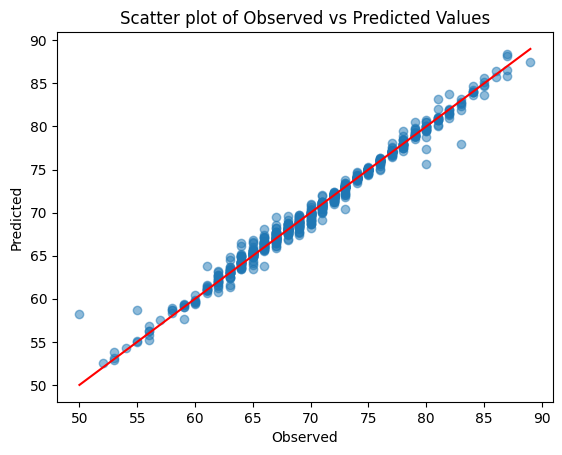

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of observed vs predicted values
plt.scatter(rf_target_test, rf_predictions, alpha=0.5)
plt.title('Scatter plot of Observed vs Predicted Values')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.plot([min(rf_target_test), max(rf_target_test)], [min(rf_target_test), max(rf_target_test)], color='red') # Line of perfect prediction
plt.show()


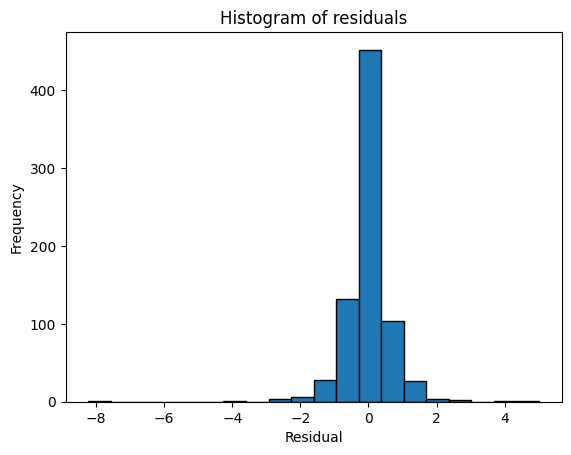

In [ ]:
# Histogram of residuals
rf_residuals = rf_target_test - rf_predictions
plt.hist(rf_residuals, bins=20, edgecolor='black')
plt.title('Histogram of residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming df is your DataFrame and it's already loaded
gb_features = pr_selected.drop(['Overall','player_name'], axis=1)
gb_target = pr_selected['Overall']

# Split the data into training set and test set
gb_features_train, gb_features_test, gb_target_train, gb_target_test = train_test_split(gb_features, gb_target, test_size=0.2, random_state=42)

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
gb_model.fit(gb_features_train, gb_target_train)

# Make predictions
gb_predictions = gb_model.predict(gb_features_test)

# Calculate the root mean squared error of your predictions
gb_rmse = np.sqrt(mean_squared_error(gb_target_test, gb_predictions))

print("Root Mean Squared Error: ", gb_rmse)


Root Mean Squared Error:  0.7506807173889736


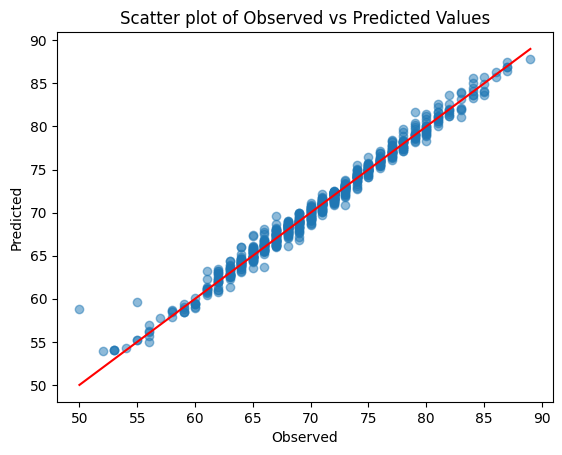

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of observed vs predicted values
plt.scatter(gb_target_test, gb_predictions, alpha=0.5)
plt.title('Scatter plot of Observed vs Predicted Values')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.plot([min(gb_target_test), max(gb_target_test)], [min(gb_target_test), max(gb_target_test)], color='red') # Line of perfect prediction
plt.show()


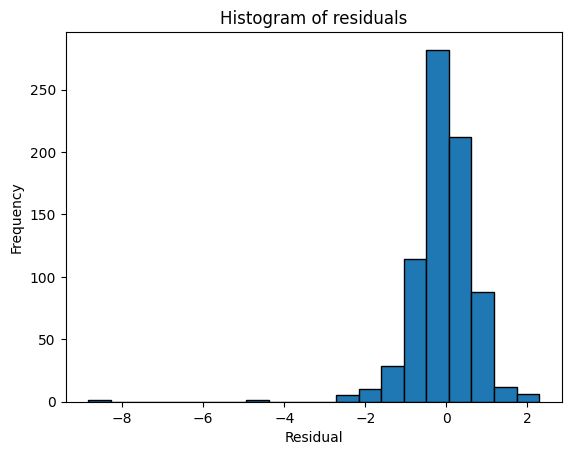

In [ ]:
# Histogram of residuals
gb_residuals = gb_target_test - gb_predictions
plt.hist(gb_residuals, bins=20, edgecolor='black')
plt.title('Histogram of residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


Both the Random Forest and Gradient Boosting models yielded relatively low RMSE values in our tests, which indicates high predictive accuracy. This was corroborated by scatter plots of the observed versus predicted performance scores, where most points were observed to fall along a straight diagonal line. This line signifies perfect prediction, so our models can be considered highly accurate as most points congregated around this line.

Furthermore, the histogram of residuals (the differences between the observed and predicted performance scores) was roughly symmetric and centered around zero, suggesting that the models' predictions were unbiased on average.

Considering these performance metrics and visualization results, we can confidently assert that both models performed exceptionally well on the task of predicting soccer player performance scores from player attributes.

However, a more thorough evaluation could involve comparing these models on additional metrics, performing cross-validation, tuning hyperparameters, and testing on more diverse datasets. Despite this, the preliminary results indicate strong predictive power and robustness of the chosen models.

Specifically, the real-life performance of players are currently not well represented when predicting a player's overall score. This might due to the lack of comprehensiveness by using "goal" and "assist" alone as players play in different style and positions.

We look forward to refining these models further and applying them to more soccer player data to assist in player evaluation, team building, and strategic planning.

# Ethics & Privacy

The data for this project is publicly available and has been anonymized to maintain the privacy of individual players and teams. Even though the data is anonymized, it is important to handle it responsibly. We recognize that predictive models can unintentionally exhibit or amplify biases in the data. We will take steps to identify and mitigate any potential bias in the dataset. We will also address potential biases in our report. We also recognize that our project may present real-world impacts as it contains real names and places. We will adress these concerns in our project discussion.

# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* Timely communication on discord/imessage groupchat weekly to address left-over problems from meetings
* All members contribute equally and stick to their responsibility as assigned
* Collaborate via google collab and google doc 
* Address comments and issues received from instructors and peer reviews
* Be respectful to every team member

# Project Timeline Proposal

We plan to follow the schedule:

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/14  | All Afternoon |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 5/16  |  5 PM |  Finalize research space and address previous work (Hinn) | Discuss ideal dataset(s) and ethics (Jingyue); complete and submit project proposal | 
| 5/19  | 11 AM  | Import & Wrangle datasets (all)  | Discuss Wrangling and Model selection; Each will come with one proposal before meeting |
| 5/22  | 5 PM  | Finalize previous sections and start EDA (Maradonna) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 5/28  | 12 PM  | Begin analysis (all) | Discuss/edit project code; Complete project |
| 6/01  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Carlos)| Discuss/edit full project |
| 6/14  | Before 11:59 PM  | Review and Finalize write-up | Turn in Final Project and team evaluation |

# Footnotes

<a name="1note"></a>1.[^](#1):  https://www.nytimes.com/2022/05/10/sports/soccer/fifa-ea-sports.html<br>
<a name="2note"></a>2.[^](#2): https://www.ea.com/games/fifa/news/ea-sports-fifa-and-the-impact-on-soccer-in-the-usa<br>
<a name="3note"></a>3.[^](#3): https://ieeexplore.ieee.org/abstract/document/9721908<br>
<a name="6note"></a>4.[^](#4): https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8474750<br>
<a name="4note"></a>5.[^](#5): https://www.kaggle.com/datasets/hugomathien/soccer <br>
<a name="5note"></a>6.[^](#6): https://www.kaggle.com/datasets/davidcariboo/player-scores<br>
